In [10]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

GreenBackground_photo = cv2.imread('GreenBackground.png', 1)
GreenBackground_photo = cv2.resize(GreenBackground_photo, (678, 380))

Object_photo = cv2.imread('Object.png', 1)
Object_photo = cv2.resize(Object_photo, (678, 380))

NewBackground_photo = cv2.imread('NewBackground.jpg', 1)
NewBackground_photo = cv2.resize(NewBackground_photo, (678, 380))


Xây dựng hàm compute_difference()

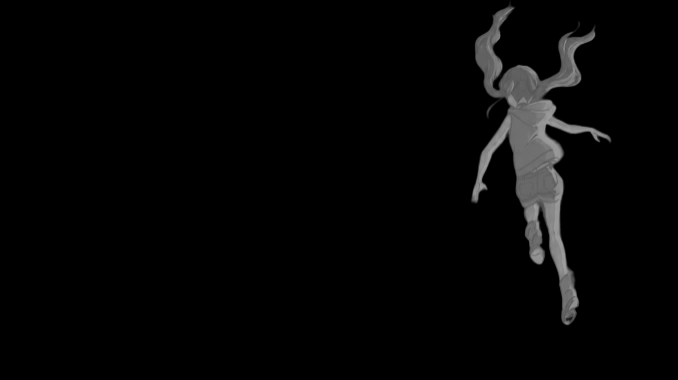

In [11]:
def computeDifference(GreenBackGround, Object):
    difference_three_channel = cv2.absdiff(GreenBackGround, Object)
    difference_single_channel = np.sum(difference_three_channel, axis=2) / 3.0
    difference_single_channel = difference_single_channel.astype('uint8')

    return difference_single_channel

difference_single_channel = computeDifference(GreenBackground_photo, Object_photo)
cv2_imshow(difference_single_channel)

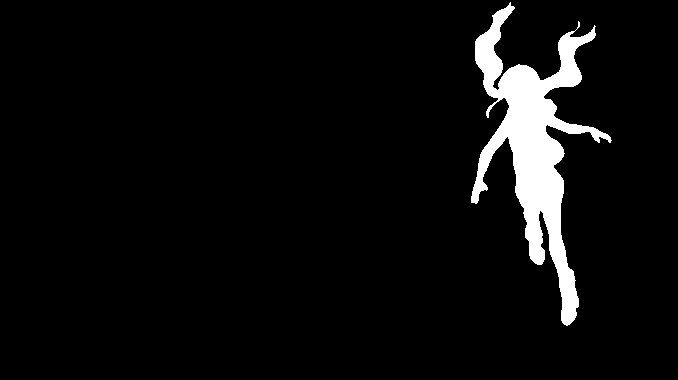

In [12]:
def computeBinaryMask(difference_single_channel):
    difference_binary = np.where(difference_single_channel >= 15, 255, 0)
    difference_binary = np.stack((difference_binary,)*3, axis=-1)
    return difference_binary

binary_mask = computeBinaryMask(difference_single_channel)
cv2_imshow(binary_mask)

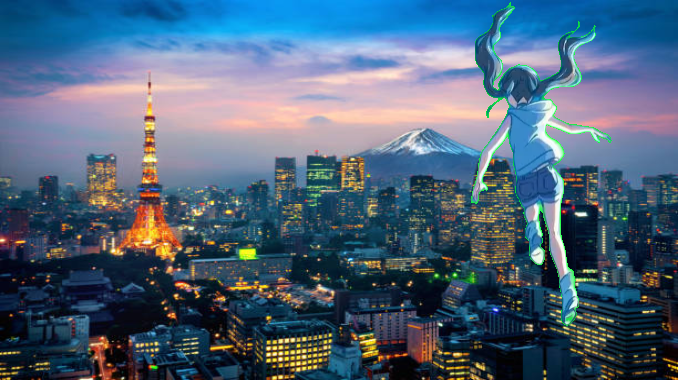

In [13]:
def replaceBackGround(GreenBackGround, NewBackGround, Object):
    difference_single_channel = computeDifference(GreenBackGround,Object)
    binary_mask = computeBinaryMask(difference_single_channel)

    output = np.where(binary_mask==255, Object, NewBackGround)

    return output

output = replaceBackGround(GreenBackground_photo, NewBackground_photo, Object_photo)

cv2_imshow(output)